In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("white")
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, roc_curve

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
data = pd.read_csv("/drive/MyDrive/ECG/time_series_data_v2.csv")
data_fft = pd.read_csv("/drive/MyDrive/ECG/time_series_data_v2_fft.csv")

In [4]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340
0,0,-5.412070,-4.912070,-4.912070,-4.412070,-3.912070,-3.912070,-3.412070,-2.912070,-2.412070,...,3.843349,4.843349,5.843349,6.343349,7.343349,7.843349,7.343349,7.343349,7.343349,0.0
1,1,-0.427619,-0.927619,-1.927619,-1.427619,-0.927619,-0.927619,-0.927619,-0.927619,-1.927619,...,4.419414,2.919414,1.919414,0.419414,-0.580586,-0.580586,-0.580586,-1.580586,-1.580586,0.0
2,2,-1.890976,-1.890976,-1.890976,-1.890976,-1.890976,-1.390976,-1.390976,-1.390976,-1.890976,...,-5.128805,-6.128805,-6.878805,-6.378805,-6.128805,-6.128805,-6.128805,-5.628805,-5.128805,0.0
3,3,-6.685704,-8.685704,-8.685704,-9.185704,-9.685704,-9.685704,-9.519038,-9.685704,-9.185704,...,-0.994153,-0.994153,-0.994153,0.005847,1.005847,2.339181,3.505847,4.505847,5.005847,0.0
4,4,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,...,11.571700,7.264008,3.071700,0.571700,0.321700,0.071700,0.071700,-0.428300,-0.428300,0.0


In [5]:
data_fft.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340
0,0,4.490630e-12,359.395768,240.342434,1258.060134,13.122370,61.994324,766.815409,72.645237,186.690957,...,187.401586,388.370320,687.743072,283.196842,849.694497,663.830240,484.992300,85.545474,299.688356,0.0
1,1,5.329071e-12,479.417114,257.187165,251.930201,429.970026,140.706199,77.617094,485.338913,330.590845,...,398.369226,951.579475,329.318267,883.013494,3263.566460,400.117978,3368.227865,2435.154186,492.071458,0.0
2,2,1.293188e-12,68.573003,210.118415,116.525644,48.964283,40.511865,320.467451,99.546274,64.076258,...,296.921270,315.521732,426.457402,455.735550,39.154757,708.575171,320.886489,166.594401,275.528160,0.0
3,3,1.108447e-12,349.856849,885.813195,375.552156,502.618042,417.290936,716.789186,147.643562,333.990301,...,1572.380407,1789.084686,899.106305,1040.144786,1442.152588,1596.893890,1751.284122,409.093644,341.973455,0.0
4,4,3.936407e-12,418.503978,651.546860,604.039039,220.816691,161.243231,269.548376,203.215322,231.956815,...,1195.016656,650.147669,795.512546,783.281097,2432.411685,1609.324637,515.542437,815.970564,256.701788,0.0


In [6]:
X = data.iloc[:,1:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
y[y !=0] = 1
X_fft = data_fft.iloc[:,1:-1].to_numpy()
y_fft = data_fft.iloc[:,-1].to_numpy()
y_fft[y_fft !=0] = 1


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=111,
                                                    stratify=y)

X_fft_train, X_fft_test, y_fft_train, y_fft_test = train_test_split(X_fft, y_fft,
                                                    test_size=0.3,
                                                    random_state=111,
                                                    stratify=y_fft)

In [7]:
X.shape

(928, 7340)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

0.7096774193548387
0.9064748201438849
0.6494845360824743


In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_fft_train,y_fft_train)
y_pred = knn.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_pred))
print( precision_score(y_fft_test,y_pred))
print( recall_score(y_fft_test,y_pred))

0.8136200716845878
0.94375
0.7783505154639175


In [14]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Dense(16, activation='relu', input_shape=(7500,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                120016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 120322 (470.01 KB)
Trainable params: 120322 (470.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# we compile the network like so
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
# Check the shape of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# If the shapes are not as expected, adjust the preprocessing steps or reshape parameters accordingly
# For example, if the number of samples is incorrect, revisit how you load or preprocess the data
# If the number of features is incorrect, verify the data transformation or feature extraction process

# Alternatively, if the shape is correct but the data size is unexpected, you may need to debug the data loading or preprocessing steps

# Once you identify the issue, adjust the code accordingly and attempt to reshape the data again


X_train shape: (649, 7340)
X_test shape: (279, 7340)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input dimensions
input_dim = 7340
num_classes = 10  # Assuming you have 10 classes for classification

# Step 1: Define Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Step 2: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Fit Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 4: Evaluate Model (Optional)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/100
21/21 [==============================] - 2s 28ms/step - loss: 5.8160 - accuracy: 0.6194 - val_loss: 2.2303 - val_accuracy: 0.7742
Epoch 2/100
21/21 [==============================] - 0s 15ms/step - loss: 0.6539 - accuracy: 0.9230 - val_loss: 1.6104 - val_accuracy: 0.8710
Epoch 3/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0658 - accuracy: 0.9846 - val_loss: 2.0947 - val_accuracy: 0.8710
Epoch 4/100
21/21 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1822 - val_accuracy: 0.8710
Epoch 5/100
21/21 [==============================] - 0s 15ms/step - loss: 2.6866e-04 - accuracy: 1.0000 - val_loss: 2.2013 - val_accuracy: 0.8674
Epoch 6/100
21/21 [==============================] - 0s 16ms/step - loss: 1.0616e-04 - accuracy: 1.0000 - val_loss: 2.2039 - val_accuracy: 0.8674
Epoch 7/100
21/21 [==============================] - 0s 14ms/step - loss: 7.5647e-05 - accuracy: 1.0000 - val_loss: 2.2034 - val_accuracy: 0

In [20]:
history_dict = history.history

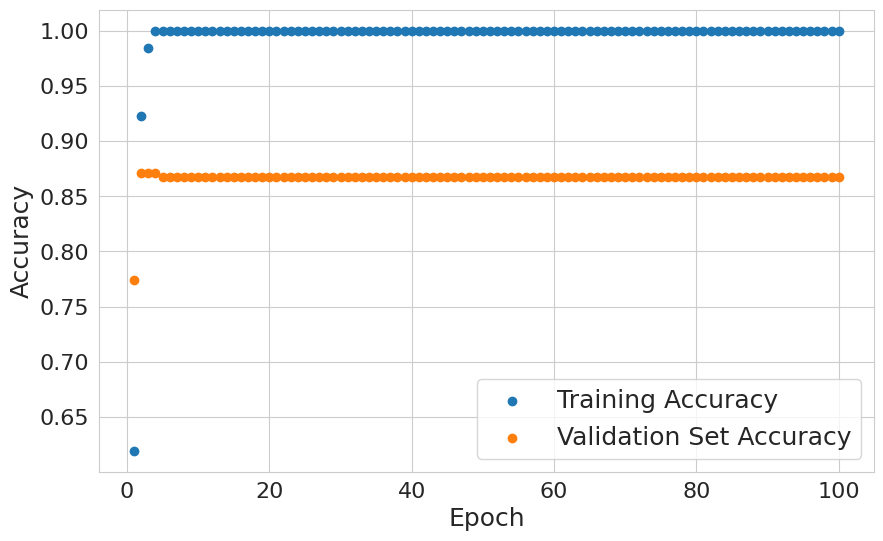

In [21]:
set_style("whitegrid")

plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

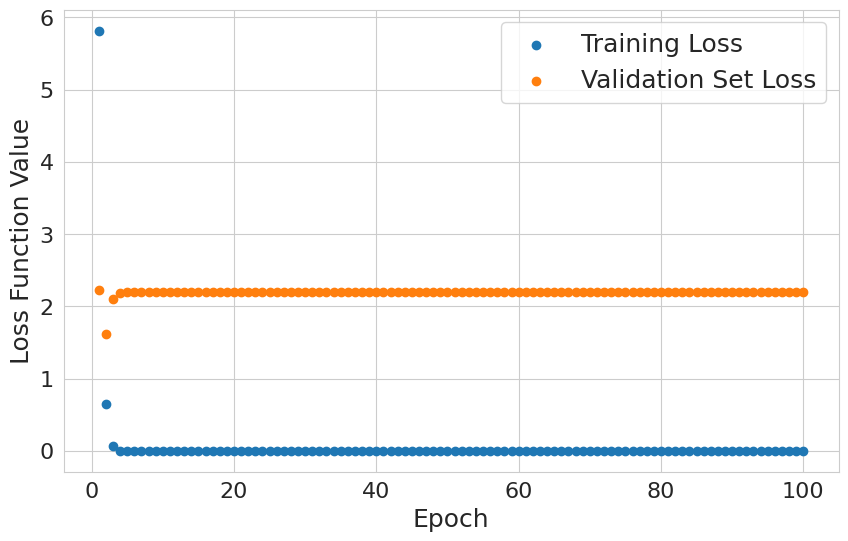

In [22]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,101), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [23]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict(X_test)[:,1])

9/9 [==============================] - 0s 4ms/step


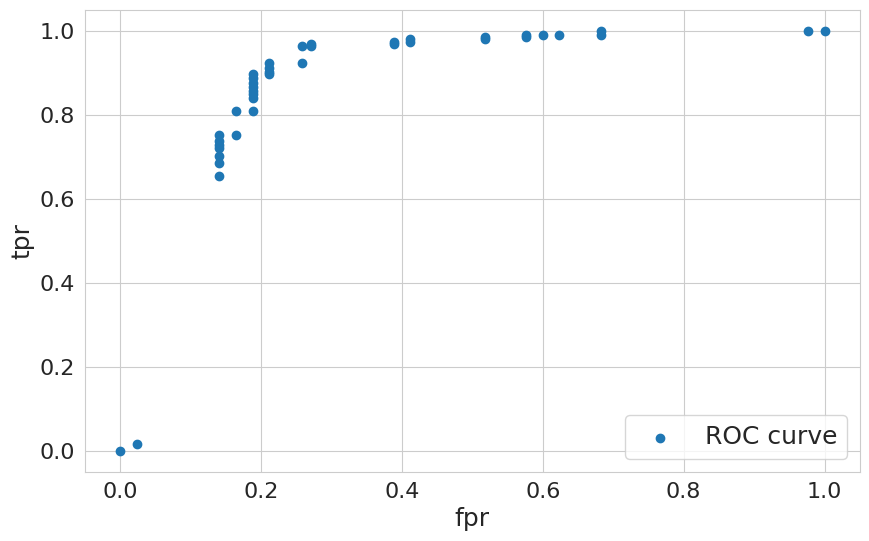

In [24]:
plt.figure(figsize = (10,6))

plt.scatter(fpr, tpr ,label = "ROC curve")

plt.xlabel("fpr", fontsize=18)
plt.ylabel("tpr", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [25]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(256, activation='relu', input_shape=(7500,)))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1920256   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2052354 (7.83 MB)
Trainable params: 2052354 (7.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [27]:
# Check the shape of X_train and X_test
print("X_fft_train shape:", X_fft_train.shape)
print("X_fft_test shape:", X_fft_test.shape)

# If the shapes are not as expected, adjust the preprocessing steps or reshape parameters accordingly
# For example, if the number of samples is incorrect, revisit how you load or preprocess the data
# If the number of features is incorrect, verify the data transformation or feature extraction process

# Alternatively, if the shape is correct but the data size is unexpected, you may need to debug the data loading or preprocessing steps

# Once you identify the issue, adjust the code accordingly and attempt to reshape the data again


X_fft_train shape: (649, 7340)
X_fft_test shape: (279, 7340)


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input dimensions based on the FFT-transformed data shape
input_dim = X_fft_train.shape[1]
num_classes = 10  # Replace with the actual number of classes

# Define the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_fft_train, y_fft_train, epochs=100, batch_size=32, validation_data=(X_fft_test, y_fft_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_fft_test, y_fft_test)
print('Test accuracy:', test_acc)


NameError: name 'X_fft_train' is not defined

In [29]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train);
y_pred_gnb = model_gnb.predict(X_test)
print( accuracy_score(y_test,y_pred_gnb))
print( precision_score(y_test,y_pred_gnb))
print( recall_score(y_test,y_pred_gnb))

0.7526881720430108
0.9194630872483222
0.7061855670103093


In [30]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_fft_train, y_fft_train);
y_fft_pred_gnb = model_gnb.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred_gnb))
print( precision_score(y_fft_test,y_fft_pred_gnb))
print( recall_score(y_fft_test,y_fft_pred_gnb))

0.6630824372759857
0.923728813559322
0.5618556701030928


In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
print( accuracy_score(y_test,y_pred_log_reg))
print( precision_score(y_test,y_pred_log_reg))
print( recall_score(y_test,y_pred_log_reg))

0.7562724014336918
0.8795180722891566
0.7525773195876289


In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_fft_train[:,:],y_fft_train)
y_fft_pred_log_reg = log_reg.predict(X_fft_test[:,:])
print( accuracy_score(y_fft_test,y_fft_pred_log_reg))
print( precision_score(y_fft_test,y_fft_pred_log_reg))
print( recall_score(y_fft_test,y_fft_pred_log_reg))

0.953405017921147
0.9788359788359788
0.9536082474226805
